<a href="https://colab.research.google.com/github/Louisfhgr/Dash.py/blob/master/Kundenstamm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [2]:
import sys
import pandas as pd
import random
import numpy as np
import requests
from datetime import datetime, timedelta
import os

from datetime import datetime
import seaborn as sns

import matplotlib.pyplot as plt


In [3]:
print(sys.path)
print(f"Python Version: {sys.version}")


['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']
Python Version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [4]:
# Ordnerstruktur ausgeben
print("Aktueller Ordneraufbau:")
for root, dirs, files in os.walk('.'):
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")

Aktueller Ordneraufbau:
./
    Kundenstamm.xlsx
    .config/
        config_sentinel
        gce
        active_config
        hidden_gcloud_config_universe_descriptor_data_cache_configs.db
        .last_update_check.json
        .last_survey_prompt.yaml
        .last_opt_in_prompt.yaml
        default_configs.db
        configurations/
            config_default
        logs/
            2024.10.07/
                18.36.44.989330.log
                18.36.33.695598.log
                18.36.13.526693.log
                18.36.44.120722.log
                18.36.56.220495.log
                18.36.55.600800.log
    sample_data/
        anscombe.json
        README.md
        california_housing_train.csv
        mnist_train_small.csv
        california_housing_test.csv
        mnist_test.csv


In [7]:
# Dateipfad für die CSV-Datei
file_path = 'Kundenstamm.xlsx'

# Daten als DataFrame laden
df = pd.read_excel(file_path)


print(len(df))
df.head()

81179


,Verk.Büro,Debitor,Kanton,SFS Gebiet,Branchencode,Branche,Mitarbeiter,Jahr,Umsatz 12 Monate\nOkt.23 - Sept.24,Aufträge 2024
0,1210,100066,TI,04A,452001,Rep.Automobilien,1,2016,0.0,0
1,1210,100071,GR,03B,237000,Be-Verarb.Naturstein,0,0,0.0,0
2,1210,100092,TG,07B,981000,Herst.Ware Eigenbed.,0,0,174.5,1
3,1210,100106,SG,06B,981000,Herst.Ware Eigenbed.,0,0,0.0,0
4,1210,100109,AR,05B,812100,Gebäudereinigung,0,0,0.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81179 entries, 0 to 81178
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Verk.Büro                          81179 non-null  int64  
 1   Debitor                            81179 non-null  int64  
 2   Kanton                             81179 non-null  object 
 3   SFS Gebiet                         81179 non-null  object 
 4   Branchencode                       81179 non-null  object 
 5   Branche                            81179 non-null  object 
 6   Mitarbeiter                        81179 non-null  int64  
 7   Jahr                               81179 non-null  int64  
 8   Umsatz 12 Monate
Okt.23 - Sept.24  81179 non-null  float64
 9   Aufträge 2024                      81179 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 6.2+ MB


In [9]:
df[['Umsatz 12 Monate\nOkt.23 - Sept.24', 'Aufträge 2024']].describe()

,Umsatz 12 Monate\nOkt.23 - Sept.24,Aufträge 2024
count,8.117900e+04,81179.000000
mean,3.613475e+03,7.352899
std,4.120284e+04,58.675622
min,-5.203954e+04,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,5.067650e+02,3.000000
max,5.273248e+06,9517.000000


In [13]:
df.describe()

,Verk.Büro,Debitor,Mitarbeiter,Jahr,Umsatz 12 Monate\nOkt.23 - Sept.24,Aufträge 2024
count,81179.000000,81179.000000,81179.000000,81179.000000,8.117900e+04,81179.000000
mean,1345.008931,318278.344707,13.434090,830.031129,3.613475e+03,7.352899
std,165.918726,159684.037415,104.363165,994.476050,4.120284e+04,58.675622
min,1210.000000,100020.000000,0.000000,0.000000,-5.203954e+04,0.000000
25%,1220.000000,170065.500000,0.000000,0.000000,0.000000e+00,0.000000
50%,1230.000000,308424.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,1520.000000,410560.500000,5.000000,2022.000000,5.067650e+02,3.000000
max,1710.000000,693954.000000,12000.000000,2042.000000,5.273248e+06,9517.000000


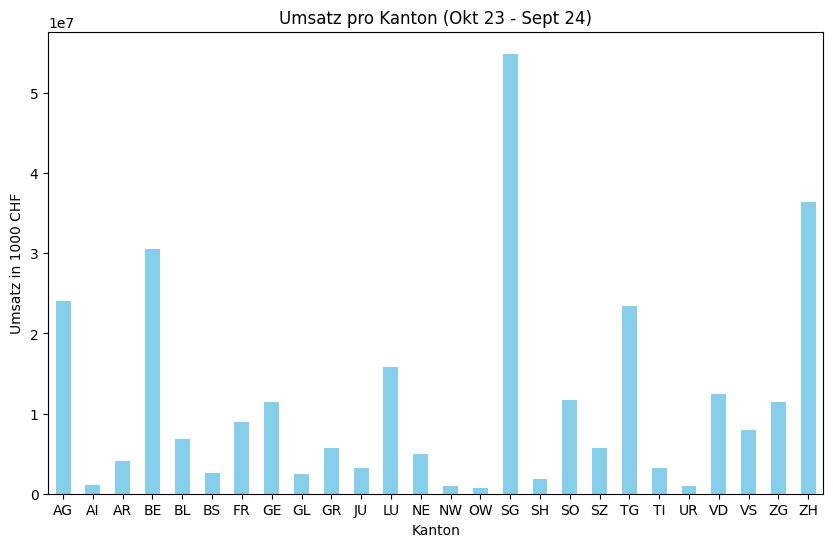

In [14]:
plt.figure(figsize=(10, 6))
df.groupby('Kanton')['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum().plot(kind='bar', color='skyblue')
plt.title('Umsatz pro Kanton (Okt 23 - Sept 24)')
plt.ylabel('Umsatz in 1000 CHF')
plt.xlabel('Kanton')
plt.xticks(rotation=0)
plt.show()

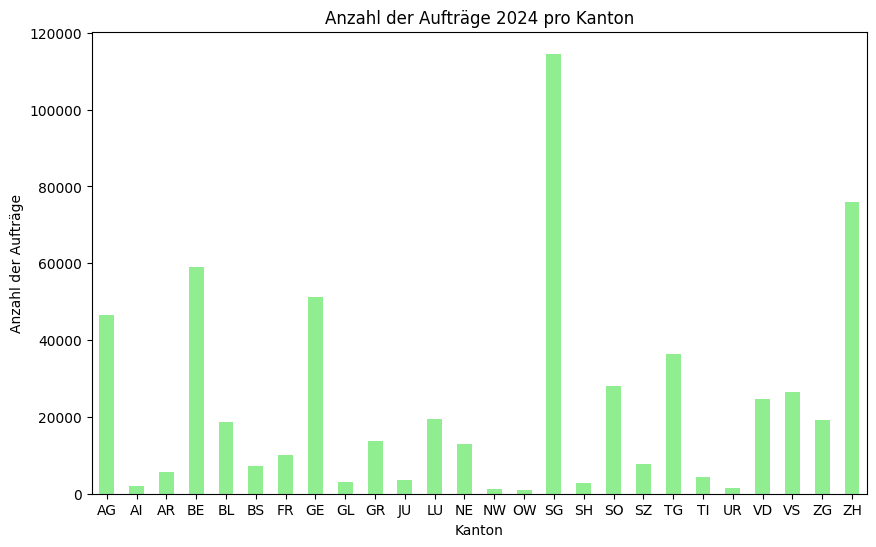

In [15]:
plt.figure(figsize=(10, 6))
df.groupby('Kanton')['Aufträge 2024'].sum().plot(kind='bar', color='lightgreen')
plt.title('Anzahl der Aufträge 2024 pro Kanton')
plt.ylabel('Anzahl der Aufträge')
plt.xlabel('Kanton')
plt.xticks(rotation=0)
plt.show()

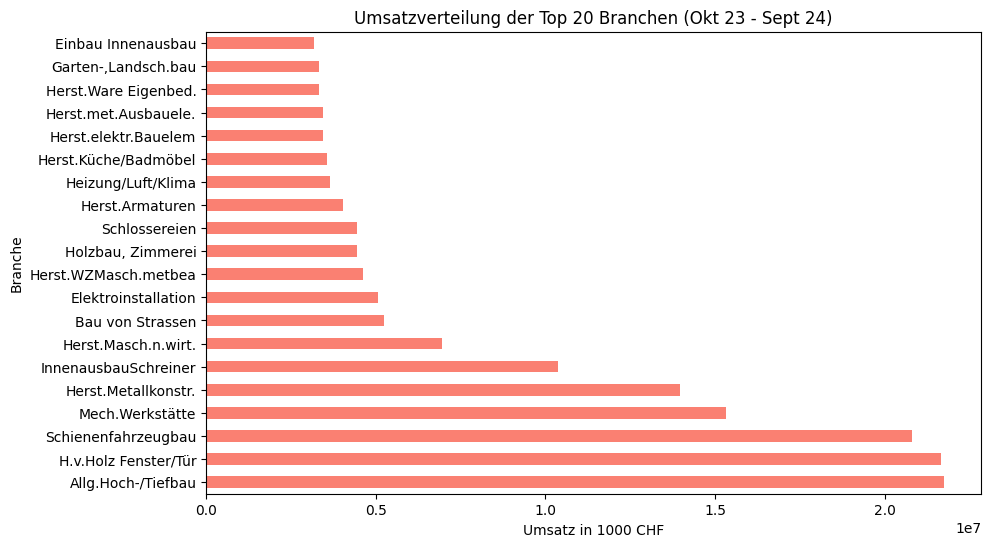

In [21]:
plt.figure(figsize=(10, 6))

# Sortiere die Branchen nach Umsatz und wähle die Top 20
top_20_branchen = df.groupby('Branche')['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum().nlargest(20)

# Erstellen des Balkendiagramms für die Top 20 Branchen
top_20_branchen.plot(kind='barh', color='salmon')

# Titel und Achsenbeschriftungen anpassen
plt.title('Umsatzverteilung der Top 20 Branchen (Okt 23 - Sept 24)')
plt.xlabel('Umsatz in 1000 CHF')
plt.ylabel('Branche')
plt.show()

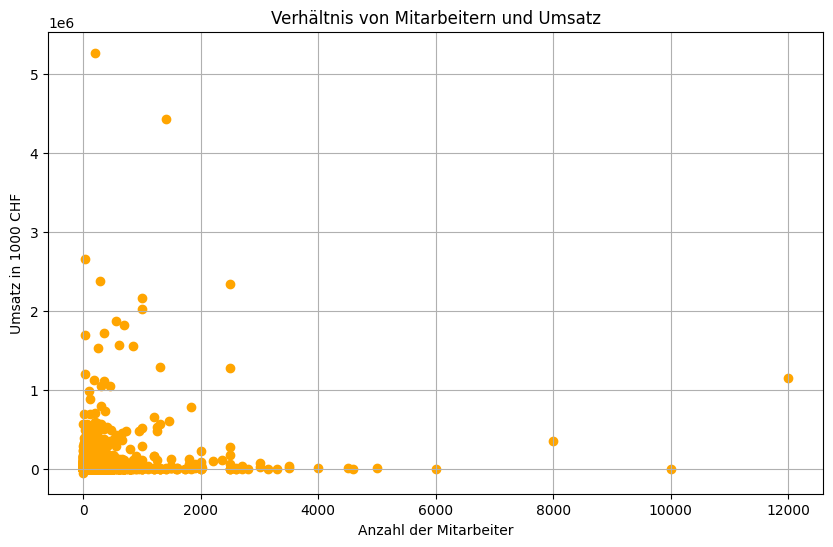

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mitarbeiter'], df['Umsatz 12 Monate\nOkt.23 - Sept.24'], color='orange')
plt.title('Verhältnis von Mitarbeitern und Umsatz')
plt.xlabel('Anzahl der Mitarbeiter')
plt.ylabel('Umsatz in 1000 CHF')
plt.grid(True)
plt.show()

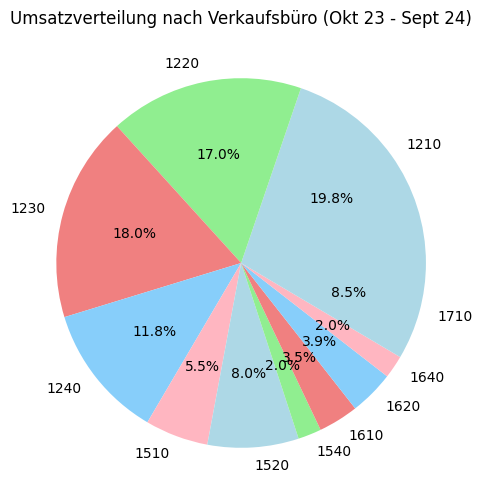

In [18]:
plt.figure(figsize=(10, 6))
df.groupby('Verk.Büro')['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Umsatzverteilung nach Verkaufsbüro (Okt 23 - Sept 24)')
plt.ylabel('')
plt.show()

In [26]:
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px

# Erstelle einen Schieberegler
#slider = widgets.IntSlider(min=1, max=50, step=1, value=20)

# Zeige den Schieberegler an
#display(slider)

# Dynamische Funktion, um die Top N Branchen anzuzeigen
def update_chart(change):
    top_n_branchen = df.groupby('Branche')['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum().nlargest(slider.value).reset_index()
    fig = px.bar(top_n_branchen,
                 x='Umsatz 12 Monate\nOkt.23 - Sept.24',
                 y='Branche',
                 orientation='h',
                 title=f'Top {slider.value} Branchen nach Umsatz')
    fig.show()

# Aktualisiere das Diagramm, wenn der Slider geändert wird
slider.observe(update_chart, names='value')

In [27]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# DataFrame laden (das verwendest du bereits)
file_path = 'Kundenstamm.xlsx'
df = pd.read_excel(file_path)

# Dropdown-Widget für die Auswahl einer Branche
branche_dropdown = widgets.Dropdown(
    options=df['Branche'].unique(),
    description='Branche:',
    disabled=False,
)

# Funktion zur Aktualisierung des DataFrames basierend auf der Auswahl
def filter_data(change):
    filtered_df = df[df['Branche'] == branche_dropdown.value]
    display(filtered_df.head())  # Anzeige der gefilterten Daten

# Verbindung der Funktion mit der Auswahländerung im Dropdown
branche_dropdown.observe(filter_data, names='value')

# Anzeige des Dropdowns
display(branche_dropdown)


Dropdown(description='Branche:', options=('Rep.Automobilien', 'Be-Verarb.Naturstein', 'Herst.Ware Eigenbed.', …

,Verk.Büro,Debitor,Kanton,SFS Gebiet,Branchencode,Branche,Mitarbeiter,Jahr,Umsatz 12 Monate\nOkt.23 - Sept.24,Aufträge 2024
31,1210,103711,SG,05A,289300,Herst.Masch.Nahrung,2500,2024,0.00,0
60,1210,105648,SG,05A,289300,Herst.Masch.Nahrung,2500,2020,2334762.49,2100
107,1210,107268,SG,05B,289300,Herst.Masch.Nahrung,14,2022,11776.05,29
235,1210,113073,GR,03B,289300,Herst.Masch.Nahrung,33,2023,0.00,0
478,1210,117789,TG,06A,289300,Herst.Masch.Nahrung,0,0,0.00,0


,Verk.Büro,Debitor,Kanton,SFS Gebiet,Branchencode,Branche,Mitarbeiter,Jahr,Umsatz 12 Monate\nOkt.23 - Sept.24,Aufträge 2024
23,1210,100995,SG,01A,132003,Sonstige Weberei,4,2023,1313.84,15
848,1210,121104,AR,01A,132003,Sonstige Weberei,450,2024,87137.03,225
1909,1210,162152,AI,05B,132003,Sonstige Weberei,100,2023,0.00,0
7863,1210,395074,AI,05B,132003,Sonstige Weberei,0,0,0.00,0
11679,1220,130153,BE,21B,132003,Sonstige Weberei,0,0,0.00,0


In [28]:
import plotly.express as px
import ipywidgets as widgets

# Schieberegler für die Anzahl der Top N Branchen
slider = widgets.IntSlider(min=1, max=50, step=1, value=10, description='Top N Branchen')

# Dynamische Funktion zur Aktualisierung des Diagramms
def update_chart(change):
    top_n_branchen = df.groupby('Branche')['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum().nlargest(slider.value).reset_index()
    fig = px.bar(top_n_branchen,
                 x='Umsatz 12 Monate\nOkt.23 - Sept.24',
                 y='Branche',
                 orientation='h',
                 title=f'Top {slider.value} Branchen nach Umsatz')
    fig.show()

# Verbindung der Funktion mit dem Schieberegler
slider.observe(update_chart, names='value')

# Anzeige des Schiebereglers
display(slider)

# Initiale Anzeige des Diagramms
update_chart(None)


IntSlider(value=10, description='Top N Branchen', max=50, min=1)

In [29]:
# Widgets für KPIs erstellen
total_sales = widgets.FloatText(
    value=df['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum(),
    description='Gesamtumsatz:',
    disabled=True,
)

total_orders = widgets.IntText(
    value=df['Aufträge 2024'].sum(),
    description='Gesamtaufträge:',
    disabled=True,
)

unique_customers = widgets.IntText(
    value=df['Debitor'].nunique(),
    description='Einzigartige Kunden:',
    disabled=True,
)

# Anzeige der KPIs
display(total_sales, total_orders, unique_customers)


FloatText(value=293338260.71999997, description='Gesamtumsatz:', disabled=True)

IntText(value=596901, description='Gesamtaufträge:', disabled=True)

IntText(value=81179, description='Einzigartige Kunden:', disabled=True)

In [30]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd

# DataFrame laden (hier müsstest du den Dateipfad zu deiner Datei anpassen)
file_path = 'Kundenstamm.xlsx'
df = pd.read_excel(file_path)

# Dashboard Titel
st.title("Interaktives Dashboard - Umsatzverteilung")

# Auswahl eines Kantons
kanton = st.selectbox("Wähle einen Kanton", df['Kanton'].unique())

# Daten filtern
filtered_df = df[df['Kanton'] == kanton]

# Umsatz anzeigen
st.write(f"Umsatz in {kanton}")
st.bar_chart(filtered_df[['Branche', 'Umsatz 12 Monate\nOkt.23 - Sept.24']].set_index('Branche'))

# Gesamtsumme des Umsatzes für den Kanton anzeigen
st.write(f"Gesamtumsatz in {kanton}: {filtered_df['Umsatz 12 Monate\nOkt.23 - Sept.24'].sum()} CHF")


Overwriting app.py


In [34]:
# Importiere ngrok und starte Streamlit
from pyngrok import ngrok

# Öffne einen Tunnel für die Streamlit-App
public_url = ngrok.connect(port='8501')
print(f"Streamlit Dashboard URL: {public_url}")

# Starte Streamlit
!streamlit run app.py &>/dev/null &


ERROR:pyngrok.process.ngrok:t=2024-10-09T07:58:33+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-09T07:58:33+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-09T07:58:33+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.